In [1]:
import sympy as sp
sp.init_printing()
%matplotlib inline

### Problem 1.12

The height of a certain hill (in feet) is given by $$h(x,y) = 10\left(2xy - 3x^2 - 4y^2 -18x + 28y +12\right), $$ where $y$ is the distance in miles north, $x$ the distance east of South Hadley.

1. Where is the top of the hill located?
2. How high is the hill?
3. How steep is the slope (in feet per mile) at a point 1 mile north and one mile east of South Hadley? In what direction is the slope steepest at that point?
---
#### Solution
The top of the hill is located at the spot where the gradient is zero. This might look like it's only one equation for two unknowns, but remember that both components of the gradient have to simultaneously go to zero.

In [2]:
x,y,z  = sp.symbols('x y z')
h = 10*(2*x*y - 3*x**2 - 4*y**2 - 18*x + 28*y + 12)
h

In [3]:
sp.solve([sp.diff(h,x), sp.diff(h,y)], [x,y])

That went by a little fast, so let me do it in slow motion.

In [4]:
gradient_x_component = sp.diff(h,x)
gradient_y_component = sp.diff(h,y)

equations_to_solve = [sp.Eq(gradient_x_component, 0), sp.Eq(gradient_y_component, 0)]
variables_for_which_to_solve = [x,y]

location_of_top = sp.solve(equations_to_solve, variables_for_which_to_solve)
location_of_top

I used the additional shortcut that if you're trying to solve an equation of the form $$\text{left hand side} = 0, $$
you can just pass in the left hand side instead of building an equation (which is what I did with `sp.Eq()` in the slow motion version)


For the height at the top, we substitute in the highest location. We can do this two ways:
1. with `subs()`.
2. with `lambdify()`.

First, using `subs()`. In the previous set of solutions, I chained calls to `subs()` to do multiple substitutions. There is another way to do this, however; just pass in a python dictionary with all of the substitutions you want to use. Fortunately, when called with multiple things to solve for, `sp.solve` returns a dictionary, so we have one handy for this operation.

In [5]:
h.subs(location_of_top)

Next, with `lambdify`. This is a function that turns a `sympy` expression into a python function that can calculate numerical results.

In [6]:
hill_height = sp.lambdify((x,y), h)

In [7]:
hill_height(-2,3)

Why would you want to do this when the substitution method is so easy? For this problem, you probably wouldn't. If, however, you wanted to make a plot of the hill, or otherwise use its geometry, `lambdify` would make that much easier.

In answer to the third part, the steepness of the hill is given by the magnitude of the gradient. We will make a gradient vector...

In [8]:
grad_h = sp.Matrix([[sp.diff(h,x), sp.diff(h,y), sp.diff(h,z)]])
grad_h

... evaluate it at the point $(1,1)$...

In [9]:
grad_at_point = grad_h.subs({x:1, y:1})
grad_at_point

... and measure its magnitude as the square root of the vector dotted into itself.

In [10]:
sp.sqrt(grad_at_point.dot(grad_at_point))

The direction of maximum steepness is the direction of the gradient vector, which is pretty obviously $(-1,1,0)$, or northwest.

----

----

### Problem 1.13
*Note: this problem uses Griffiths' notation for the separation vector (a cursive r) which is not easily rendered in LaTeX or Markdown. I'm changing the notation to make things easier on myself from a typesetting perspective.*

Let $\mathfrak{r}$ be the separation vector from a fixed point $(x', y', z')$ to the point $(x, y, z)$, and let $|\mathfrak{r}|$ be its length. Show that

1. $\nabla\left(|\mathfrak{r}|^2\right) = 2\mathfrak{r}$
2. $\nabla\left(1/|\mathfrak{r}|\right) = -\hat{\mathfrak{r}}/|\mathfrak{r}|^2$
3. What is the general formula for $\nabla\left(|\mathfrak{r}|^n\right)$?
---

#### Solution

Build the parts we're going to use first.

In [11]:
from IPython.display import Math

In [12]:
x,y,z,xprime,yprime,zprime = sp.symbols('x y z xprime yprime zprime')
rr,rrmag = sp.symbols('rfrak rfrakabs')

r = sp.Matrix([[x,y,z]])
rprime = sp.Matrix([[xprime, yprime, zprime]])
sep = r - rprime
sepmag = sp.sqrt(sep.dot(sep))

# This is to get around a quirk in the way sympy displays equations
Math("{} = {}".format(sp.latex(rr), sp.latex(sep)))

<IPython.core.display.Math object>

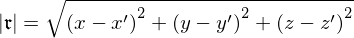

In [13]:
sp.Eq(rrmag, sepmag)

Define a gradient operator for use in cartesian coordinates.

In [14]:
def gradient(expr):
    return sp.Matrix([[expr.diff(x), expr.diff(y), expr.diff(z)]])

Check $\nabla\left(|\mathfrak{r}|^2\right) = 2\mathfrak{r}$

In [15]:
gradient(sepmag**2) == 2*sep

True

Check $\nabla\left(1/|\mathfrak{r}|\right) = -\hat{\mathfrak{r}}/|\mathfrak{r}|^2$

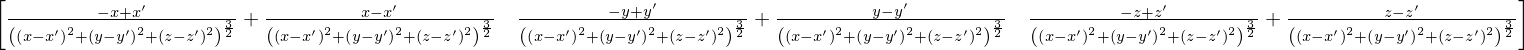

In [16]:
result_b = gradient(1/sepmag) + sep/sepmag**3
result_b

In [17]:
sp.simplify(result_b)

Okay, what about the general case?

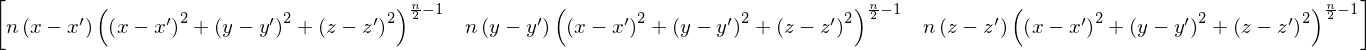

In [18]:
n = sp.symbols('n', integer=True)
sp.simplify(gradient(sepmag**n))

This looks like $n\mathfrak{r}|\mathfrak{r}|^{n-2}$.  Let's check.

In [19]:
sp.simplify(sp.simplify(gradient(sepmag**n)) - n*sep*sepmag**(n-2))

---

---


### Problem 1.16

Sketch the vector function $$\mathbf{v} = {\hat{\mathbf{r}}\over r^2} $$ and compute its divergence. The answer may surprise you. Can you explain it?

---
#### Solution
Since we're working with a computer, we can't really sketch; we have to plot. That's not hard to do, though. Generally speaking, the most useful plot to use with vector fields is called a quiver plot. In `matplotlib` (the most commonly used python scientific plotting library), we would put together a quiver plot like this:

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

%matplotlib inline

# set up the domain; polar coordinates make sense for this problem
r = np.linspace(0.5, 4.5, 5)
phi = np.linspace(0, 2*np.pi, 10, endpoint=False)

R,Phi = np.meshgrid(r,phi)

# convert to cartesian for the plot
X = R*np.cos(Phi)
Y = R*np.sin(Phi)

# We will assume z=0 for all of this, so we can leave it out.
x,y = sp.symbols('x y')
rvec = sp.Matrix([[x, y]])
rmag = sp.sqrt(rvec.dot(rvec))
rhat = rvec/rmag

v = rhat/rmag**2

In [21]:
v_x = v[0]
v_y = v[1]

v_x_func = sp.lambdify((x,y), v_x)
v_y_func = sp.lambdify((x,y), v_y)

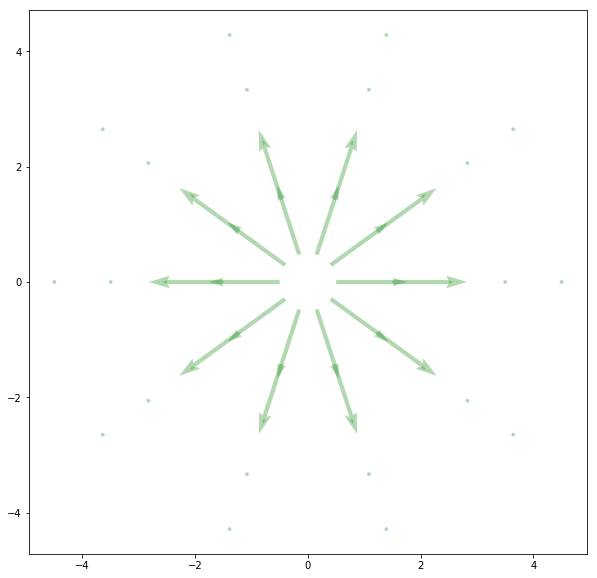

In [22]:
U = v_x_func(X, Y)
V = v_y_func(X, Y)

fig = plt.figure(figsize=(10,10))
plt.quiver(X, Y, U, V, color='green', alpha=0.3)

Quiver plots are tricky, because you often have the problem that you're comparing things with very different magnitudes. You can see a number of locations in the above plots where there is just a dot instead of an arrow, and there is a ring of arrowheads without stems (indicating rather short arrows, but not short enough to just be dots).

There are, of course, other strategies for plotting the magnitudes of vectors. Two relatively common ones are (a) tying the magnitude to a color, and (b) tying the magnitude to opacity. I'm not going to explore either of those options here primarily because we're just interested in getting a sense for the shape of the vector field (hence the word "sketch" in the problem description) and we can get that from the plot I've already made.

This looks similar to our canonical divergence field, though the arrows are getting shorter as they go out from the center. What is the calculated divergence?

In [23]:
def cartesian_div(vector_field):
    
    x,y,z = sp.symbols('x y z')
    
    return sp.diff(vector_field[0], x) + sp.diff(vector_field[1], y) + sp.diff(vector_field[2], z)

Since I've defined my divergence in three dimensions, I need to redefine my field in three dimensions, too.

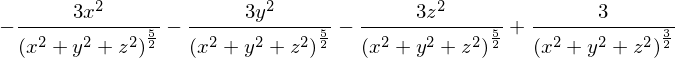

In [24]:
x,y,z = sp.symbols('x y z')
rvec = sp.Matrix([[x, y, z]])
rmag = sp.sqrt(rvec.dot(rvec))
rhat = rvec/rmag
v = rhat/rmag**2

cartesian_div(v)

In [25]:
sp.simplify(cartesian_div(v))

So the divergence is zero. Now, clearly there's some divergence at $\mathbf{r}=0$, because the field has to come from somewhere. So what gives?

The trick is that you're dividing by zero at the origin, so things break down there, and we have to use a different approach (essentially equivalent to using L'Hospital's rule) to calculate the divergence there.

--- 

---

### Problem 1.19

Draw a circle in the $xy$ plane. At a few representative points draw the vector $\mathbf{v}$ tangent to the circle, pointing in the clockwise direction. By comparing  adjacent vectors, determine the sign of $\partial v_x/\partial y$ and $\partial v_y/\partial x$. According to Eq. 1.41, then, what is the direction of $\nabla\times \mathbf{v}$? Explain how this example illustrates the geometrical interpretation of the curl.

---

#### Solution

I wanted to do this problem mostly to show how to use matplotlib drawing features. In this case, I'm employing a patch collection, with the circle and arrows as individual patches within that collection.

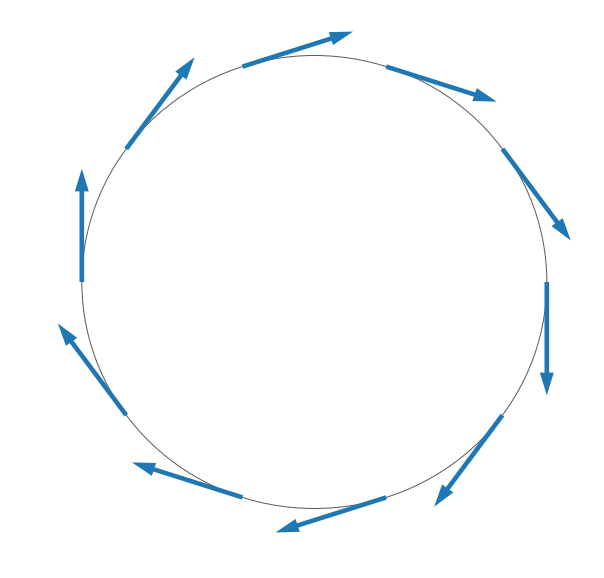

In [26]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

# radius is only really relevant in comparison to the width
# of the arrows (1 by default)
radius = 10

# "a few representative points"
phi = np.linspace(0, 2*np.pi, 10, endpoint=False)

# I played with this a bit; this looks good to me.
arrowlen = 0.5 * radius

# create the circle centered at the origin
circle = mpatches.Circle((0,0), radius=radius)

# make the body of the circle transparent white
circle.set_facecolor((1,1,1,0))
# and the edge slightly translucent gray
circle.set_edgecolor((0.2, 0.2, 0.2, 0.8))

# add the circle to our list of patches
patches = [circle,]

# draw an arrow at each of our representative points
for angle in phi:
    # location of the tail
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    # vector to the tip
    # inspection after plotting verifies that this gives clockwise arrows
    dx = arrowlen * np.sin(angle)
    dy = -arrowlen * np.cos(angle)

    # make the arrow
    arrow = mpatches.Arrow(x, y, dx, dy)
    # add it to the list of patches
    patches.append(arrow)
    
# make our plotting window    
fig, ax = plt.subplots(figsize=(10,10))

# build the collection out of the individual pieces,
# making sure that the styling doesn't get clobbered
collection = PatchCollection(patches, match_original=True)

# put the patch collection into the plot
ax.add_collection(collection)

# make the circle take up most of the figure area
ax.set_xlim((-1.2*radius,1.2*radius))
ax.set_ylim((-1.2*radius,1.2*radius))

# I don't need axes for a picture
ax.set_axis_off()

By observation, going from left to right on the bottom half of the circle, $${\partial v_y\over\partial x} = \text{negative}$$ and going from bottom to top on the right side of the circle, $${\partial v_x\over\partial y} = \text{positive}.$$ Therefore, the overall curl is in the negative $z$ direction.